In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pk

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
cars_data = pd.read_csv(r"C:\Users\Hanishree\Downloads\Cardetails.csv")
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [3]:
cars_data.shape

(8128, 13)

In [4]:
#preprocessing
cars_data.isnull().sum()   #NULL ChecK

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [5]:
cars_data.drop(columns=['torque'], inplace=True)
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [6]:
cars_data.dropna(inplace=True)
cars_data.shape

(7907, 12)

In [7]:
cars_data.duplicated().sum()  #Duplicate Check

np.int64(1189)

In [8]:
cars_data.drop_duplicates(inplace=True)
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0


In [9]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6718 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.3+ KB


In [10]:
#Data Analysis
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000  

In [11]:
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip()


In [12]:
get_brand_name('Maruti  Swift Dzire VDI')

'Maruti'

In [13]:
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [14]:
clean_data("23.4 kmpl")

23.4

In [15]:
cars_data['name'] = cars_data['name'].apply(get_brand_name)
cars_data['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [16]:
cars_data['mileage'] = cars_data['mileage'].apply(clean_data)
cars_data['max_power'] = cars_data['max_power'].apply(clean_data)
cars_data['engine'] = cars_data['engine'].apply(clean_data)

In [17]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of name
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  10250

In [18]:
cars_data['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],
       [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],inplace=True)

C:\Users\Hanishree\AppData\Local\Temp\ipykernel_12188\1558710359.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
C:\Users\Hanishree\AppData\Local\Temp\ipykernel_12188\1558710359.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_s

In [19]:
print(cars_data['transmission'].unique())

print(cars_data['seller_type'].unique())

print(cars_data['fuel'].unique())

print(cars_data['owner'].unique())

['Manual' 'Automatic']
['Individual' 'Dealer' 'Trustmark Dealer']
['Diesel' 'Petrol' 'LPG' 'CNG']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [20]:
cars_data['transmission'].replace(['Manual', 'Automatic'],[1,2], inplace=True)

cars_data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3], inplace=True)

cars_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4], inplace=True)

cars_data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
        'Fourth & Above Owner', 'Test Drive Car'],
        [1,2,3,4,5], inplace=True)

C:\Users\Hanishree\AppData\Local\Temp\ipykernel_12188\4027786121.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['transmission'].replace(['Manual', 'Automatic'],[1,2], inplace=True)
C:\Users\Hanishree\AppData\Local\Temp\ipykernel_12188\4027786121.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcastin

In [21]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   int64  
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   int64  
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 682.3 KB


In [22]:
cars_data.reset_index(inplace=True)
cars_data

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,8121,1,2013,260000,50000,2,1,1,2,18.90,998.0,67.10,5.0
6714,8122,4,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,5.0
6715,8123,4,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0
6716,8124,4,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0


In [23]:
cars_data.drop(columns=['index'], inplace=True)

for col in cars_data.columns:
    print('------------')
    print(col)
    print(cars_data[col].unique())

------------
name
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
------------
year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
------------
selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000   290000
   455000   351000   535000   175000   565000   120000   725000   185000
   615000   270000   625000   866000   375000 

In [24]:
cars_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

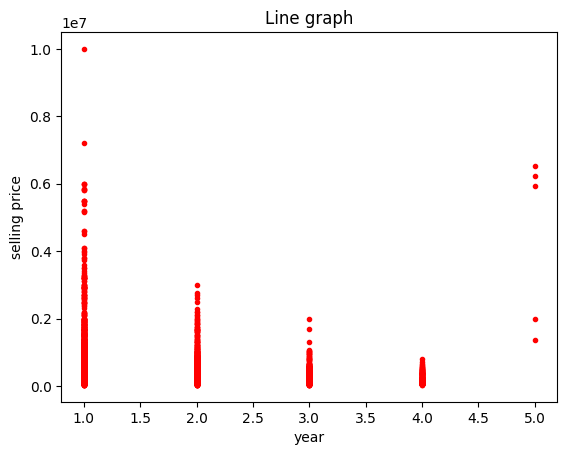

In [25]:
#data visualization
plt.plot(cars_data['owner'],cars_data['selling_price'],'.',color='red')
plt.title("Line graph")
plt.xlabel("year")
plt.ylabel("selling price")
plt.show()

In [26]:
input_data = cars_data.drop(columns=['selling_price'])
output_data =cars_data['selling_price']

x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2)

#model creation
model = LinearRegression()

#train model
model.fit(x_train, y_train)

LinearRegression()

In [27]:
predict = model.predict(x_test)
predict

array([ 496100.76193847,  870297.18311538, 1008680.22503944, ...,
        335748.50603312, 1512425.58262473,  536855.74456321],
      shape=(1344,))

In [28]:
print(f"MSE: ",mean_squared_error(y_test,predict))
print(f"R2 Score: ",r2_score(y_test,predict))

MSE:  90879707481.35057
R2 Score:  0.6213761688299826


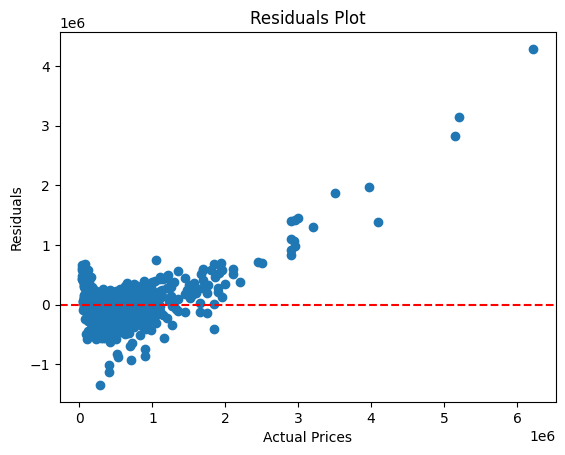

In [29]:
residuals = y_test - predict 
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.show()


In [30]:
#Testing
input_data_model = pd.DataFrame(
    [[5,2022,12000,1,1,1,1,12.99,2494.0,100.6,5.0]],
    columns=['name','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats'])

input_data_model

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,5,2022,12000,1,1,1,1,12.99,2494.0,100.6,5.0


In [31]:
model.predict(input_data_model)

array([985369.97688276])

In [32]:
pk.dump(model,open('model.pkl','wb'))